### Linear regression II (Model Selection)
Automatic model selection
1. Backward
2. Forward
3. Stepwise
4. MPG Example 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
#Copy the autoselect.py to your work directory at the same level of this notebook.
from autoselect import *

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
import statsmodels.formula.api as smf

#Use the mpg dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'

df = pd.read_csv(url)
df = df.dropna()

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Let's just get the numerical columns

In [5]:
df = df.iloc[:,:7]

Some basic exploratory visualization:
1. correlation matrix
2. This will give you pair-wise pearson'correlation coefficients

In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

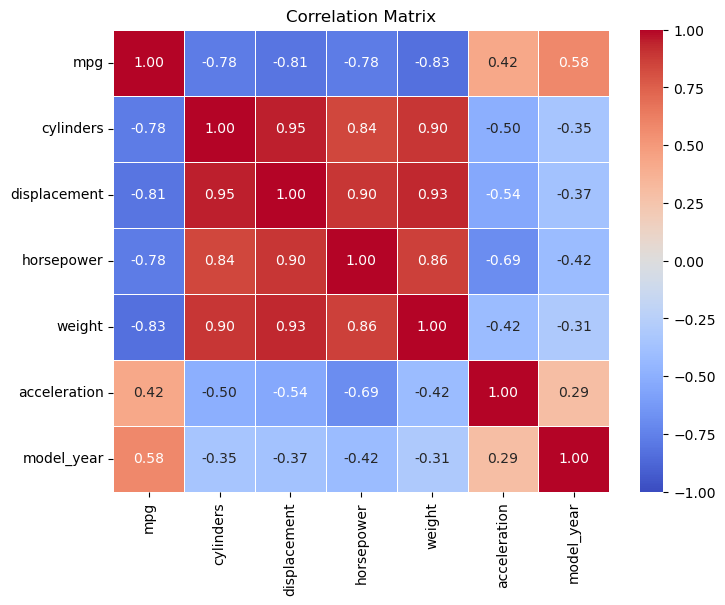

In [7]:
correlation_matrix = df.corr()


plt.figure(figsize=(8, 6))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,vmin=-1,vmax=1)

plt.title('Correlation Matrix')

2. Histogram and pair-wise scatterplot:
- Histograms are on the diagonal
- Pair-wise scatterplots are off the diagonal

/Users/ziqili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ziqili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ziqili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ziqili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

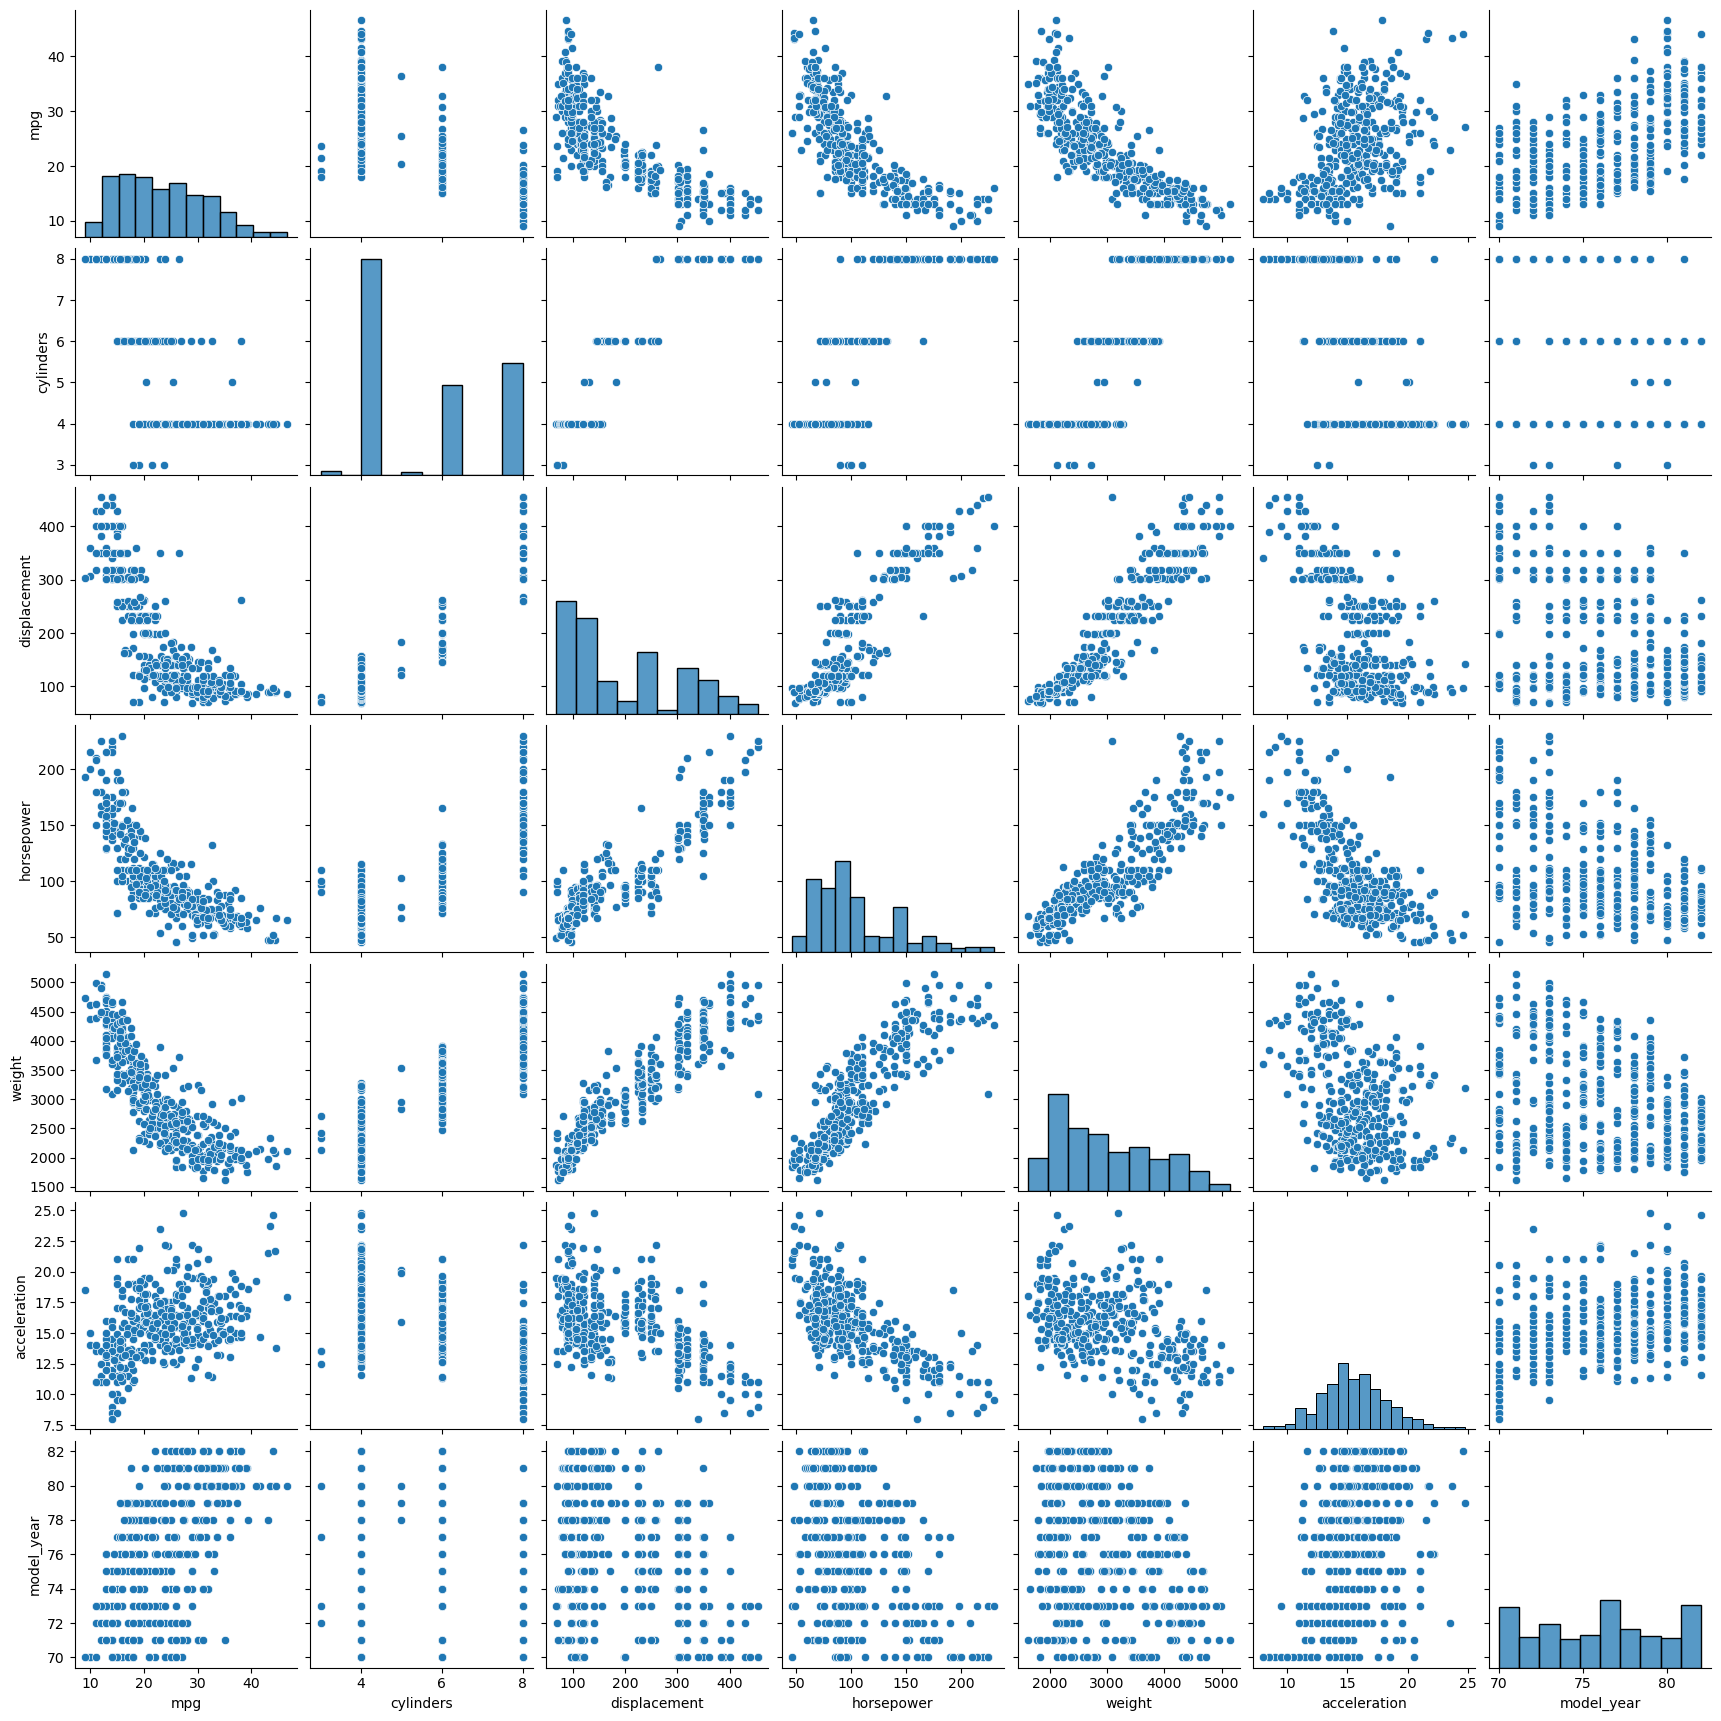

In [8]:
sns.pairplot(df)

### Model selections:

### Backward model selection:

Let's try the function:

In [9]:
y_name = 'mpg'

X_names = ['cylinders', 'acceleration','displacement', 'horsepower', 'weight', 'model_year']

backward_model_selection(y_name, X_names, df)


Current model: mpg ~ intercept + cylinders + acceleration + displacement + horsepower + weight + model_year
        current     2086.91
-     cylinders     2085.91
-  acceleration     2085.62
-  displacement     2086.02
-    horsepower     2084.91
-        weight     2177.71
-    model_year     2252.24
dropping  horsepower

Current model: mpg ~ intercept + cylinders + acceleration + displacement + weight + model_year
        current     2084.91
-     cylinders     2083.92
-  acceleration     2084.15
-  displacement     2084.07
-        weight     2196.02
-    model_year     2257.66
dropping  cylinders

Current model: mpg ~ intercept + acceleration + displacement + weight + model_year
        current     2083.92
-  acceleration     2083.11
-  displacement     2082.21
-        weight     2196.86
-    model_year     2256.15
dropping  displacement

Current model: mpg ~ intercept + acceleration + weight + model_year
        current     2082.21
-  acceleration     2081.11
-        weight   

### Forward model selection:

In [10]:
y_name = 'mpg'
X_names = ['cylinders', 'acceleration','displacement', 'horsepower', 'weight', 'model_year']

forward_model_selection(y_name,X_names,df,start=[])


Current model: mpg ~ intercept
        current     2724.38
+     cylinders     2362.57
+  acceleration     2648.97
+  displacement     2316.83
+    horsepower     2361.32
+        weight     2263.94
+    model_year     2565.26
adding  weight

Current model: mpg ~ intercept + weight
        current     2263.94
+     cylinders     2259.73
+  acceleration     2256.82
+  displacement     2257.77
+    horsepower     2248.01
+    model_year     2081.11
adding  model_year

Current model: mpg ~ intercept + weight + model_year
        current     2081.11
+     cylinders     2082.69
+  acceleration     2082.21
+  displacement     2083.11
+    horsepower     2082.83

stop

Final model: mpg ~ intercept + weight + model_year


### Stepwise model selection:

In [11]:
y_name = 'mpg'
X_names = ['cylinders', 'acceleration','displacement', 'horsepower', 'weight', 'model_year']

stepwise_model_selection(y_name,X_names,df,start=[])


Current model: mpg ~ intercept
        current     2724.38
+     cylinders     2362.57
+  acceleration     2648.97
+  displacement     2316.83
+    horsepower     2361.32
+        weight     2263.94
+    model_year     2565.26
adding  weight

Current model: mpg ~ intercept + weight
        current     2263.94
+     cylinders     2259.73
+  acceleration     2256.82
+  displacement     2257.77
+    horsepower     2248.01
+    model_year     2081.11
-        weight     2724.38
adding  model_year

Current model: mpg ~ intercept + weight + model_year
        current     2081.11
+     cylinders     2082.69
+  acceleration     2082.21
+  displacement     2083.11
+    horsepower     2082.83
-        weight     2565.26
-    model_year     2263.94

stop

Final model: mpg ~ intercept + weight + model_year


We are glad to see all three methods converge to the same model:

mpg ~ intercept + weight + model_year

### 4. MPG example

Then lets try to model mpg using this specification:

In [12]:
y = df['mpg']

X = df[['weight', 'model_year']]

X = sm.add_constant(X)

best_model = sm.OLS(y,X).fit()

In [13]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          3.33e-140
Time:                        08:55:23   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculate VIFs for assessing multi-colinearity (should all < 10, ingonore the const):

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)



const         535.739154
weight          1.105651
model_year      1.105651
dtype: float64

Check residuals plot: found strong non-linearity

Text(0.5, 1.0, 'residuals vs fitted plot')

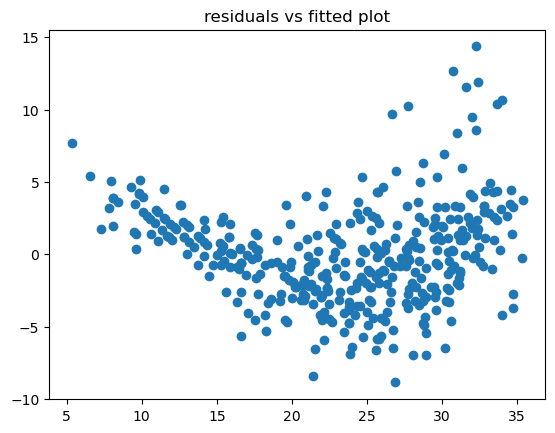

In [15]:
plt.scatter(best_model.predict(),best_model.resid)
#plt.hlines(0,2,4,color="black")
plt.title("residuals vs fitted plot")

Check Q-Q plot

In [16]:
def q_q_plot(res):
    fig, axes = plt.subplots(1, 2,figsize=(12,4))
    res.hist(ax=axes[0])
    sm.qqplot(res,line='q',ax=axes[1])

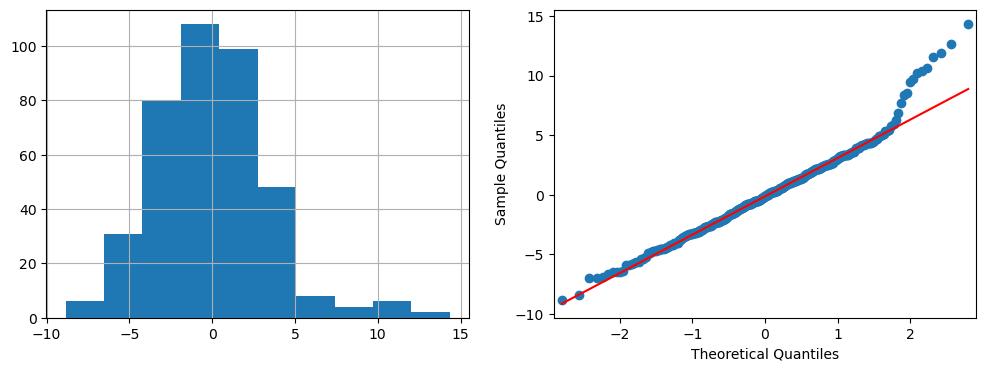

In [17]:
q_q_plot(best_model.resid)

Because of the strong non-linearity, we may think to transform the variables. Let's try to log the dependent variable mpg.

In [18]:
df['log_mpg'] = np.log(df['mpg'])

Perfrom the selection again. Here I tried the stepwise.

In [19]:
y_name = 'log_mpg'
X_names = ['cylinders', 'acceleration','displacement', 'horsepower', 'weight', 'model_year']

stepwise_model_selection(y_name,X_names,df,[])


Current model: log_mpg ~ intercept
        current      267.75
+     cylinders     -181.39
+  acceleration      182.12
+  displacement     -241.75
+    horsepower     -188.29
+        weight     -300.91
+    model_year      110.86
adding  weight

Current model: log_mpg ~ intercept + weight
        current     -300.91
+     cylinders     -313.64
+  acceleration     -313.03
+  displacement      -316.8
+    horsepower      -336.2
+    model_year     -530.15
-        weight      267.75
adding  model_year

Current model: log_mpg ~ intercept + weight + model_year
        current     -530.15
+     cylinders     -533.25
+  acceleration     -531.11
+  displacement     -530.21
+    horsepower     -534.99
-        weight      110.86
-    model_year     -300.91
adding  horsepower

Current model: log_mpg ~ intercept + weight + model_year + horsepower
        current     -534.99
+     cylinders     -535.63
+  acceleration     -533.02
+  displacement     -533.05
-        weight      -278.1
-    mode

Fit the model:

In [20]:
y = df['log_mpg']

X = df[['weight', 'model_year','horsepower','cylinders']]

X = sm.add_constant(X)
best_model_2 = sm.OLS(y,X).fit()

In [21]:
best_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     669.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.94e-172
Time:                        08:55:23   Log-Likelihood:                 272.82
No. Observations:                 392   AIC:                            -535.6
Df Residuals:                     387   BIC:                            -515.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7709      0.149     11.917      0.000       1.479       2.063
weight        -0.0003   1.86e-05    -13.861      0.000      -0.000      -0.000
model_year     0.0296      0.002     15.976      0.000       0.026       0.033
horsepower    -0.0007      0.000     -2.086      0.038      -0.001   -4.17e-05
cylinders     -0.0139      0.009     -1.619      0.106      -0.031       0.003
==============================================================================
Omnibus:                        4.915   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                6.470
Skew:                          -0.038   Prob(JB):                       0.0394
Kurtosis:                       3.625   Cond. No.                     7.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check for VIFs, all < 10.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const         587.175596
weight          6.603770
model_year      1.231875
horsepower      4.727098
cylinders       5.693196
dtype: float64

We can see things are getting MUCH better.

Text(0.5, 1.0, 'residuals vs fitted plot')

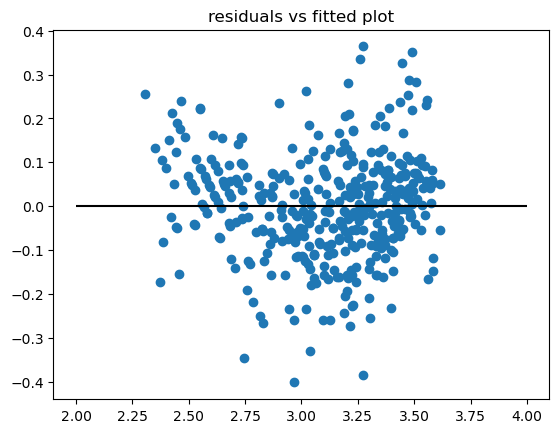

In [23]:
plt.scatter(best_model_2.predict(),best_model_2.resid)
plt.hlines(0,2,4,color="black")
plt.title("residuals vs fitted plot")

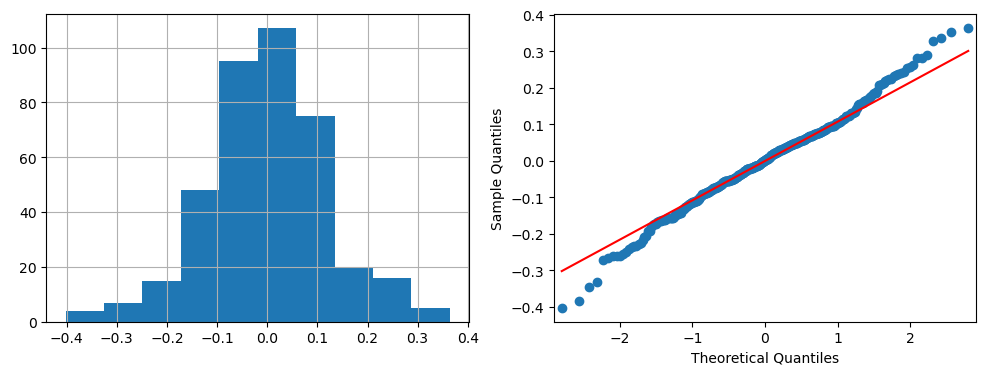

In [24]:
q_q_plot(best_model_2.resid)

We can see after taking the log transformation of the mpg, the residuals plot looks much nicer, and the residuals are more normally distributed than the previous model.